In [6]:
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns

In [2]:
data_folder = Path('./data')
classes = list(data_folder.iterdir())
classes

[PosixPath('data/running'),
 PosixPath('data/stairs'),
 PosixPath('data/walking'),
 PosixPath('data/idle')]

In [3]:
dfs = []
def flatten_sensor_frame(df): return df.values.flatten()
data_list = []
for class_folder in classes:
    for file in class_folder.iterdir():
        df = pd.read_csv(file)

        frame = flatten_sensor_frame(df)
        record = list((frame)) + [str(class_folder)]
        data_list.append(record)
        
        df['label'] = class_folder
        dfs.append(df)

    
cols = [str(i) for i in range(90)] + ['label']
full_df = pd.DataFrame(data=data_list, columns=cols)

In [4]:
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,label
0,2.667141,-7.838616,-9.548077,4.017470,8.705317,-2.226607,22.357056,20.887016,-2.820370,17.922995,...,-0.885855,11.310209,-8.939949,13.771448,9.825804,1.470040,-2.044648,6.689400,10.807426,data/running
1,10.745177,23.415293,1.144428,3.744532,-9.035717,-2.892196,0.766145,21.092916,-0.928950,23.956383,...,1.532289,15.782578,1.699883,14.168885,32.245110,3.390190,3.983952,-1.867477,-1.407790,data/running
2,22.031445,18.406622,1.537078,3.600880,12.368446,2.217031,-0.354342,-13.206416,-7.254431,8.245631,...,4.151546,24.502260,-1.139640,-0.493206,-14.542381,-2.164358,2.442086,9.677363,-3.016694,data/running
3,10.371682,-1.608903,-2.801216,25.718515,16.247053,-6.488286,-3.600879,6.684612,-2.375048,10.534488,...,17.056293,37.330395,5.621586,2.695871,11.626244,-1.082179,8.681376,12.124237,-4.946420,data/running
4,3.624822,9.059659,4.390966,33.073500,33.202790,4.802769,3.792416,3.596091,-2.681506,-1.872266,...,1.187524,13.072341,-1.953669,1.441310,-14.585477,3.610456,6.028600,17.889475,-0.732626,data/running


In [5]:
full_df.shape

(6462, 91)

In [11]:
counts = full_df['label'].value_counts()


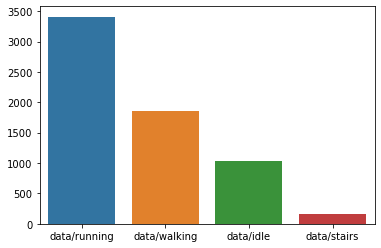

In [12]:
sns.barplot(x=counts.index, y=counts.values)

In [13]:
from sklearn.model_selection import StratifiedKFold

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [18]:
label2num = dict(enumerate(full_df['label'].unique()))
num2label = {n:i for i,n in label2num.items()}

In [19]:
X = full_df[[str(i) for i in range(90)] ]
y = full_df['label'].map(num2label)

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,2.667141,-7.838616,-9.548077,4.017470,8.705317,-2.226607,22.357056,20.887016,-2.820370,17.922995,...,12.430696,-0.885855,11.310209,-8.939949,13.771448,9.825804,1.470040,-2.044648,6.689400,10.807426
1,10.745177,23.415293,1.144428,3.744532,-9.035717,-2.892196,0.766145,21.092916,-0.928950,23.956383,...,0.363919,1.532289,15.782578,1.699883,14.168885,32.245110,3.390190,3.983952,-1.867477,-1.407790
2,22.031445,18.406622,1.537078,3.600880,12.368446,2.217031,-0.354342,-13.206416,-7.254431,8.245631,...,-6.019023,4.151546,24.502260,-1.139640,-0.493206,-14.542381,-2.164358,2.442086,9.677363,-3.016694
3,10.371682,-1.608903,-2.801216,25.718515,16.247053,-6.488286,-3.600879,6.684612,-2.375048,10.534488,...,-5.200206,17.056293,37.330395,5.621586,2.695871,11.626244,-1.082179,8.681376,12.124237,-4.946420
4,3.624822,9.059659,4.390966,33.073500,33.202790,4.802769,3.792416,3.596091,-2.681506,-1.872266,...,-4.079719,1.187524,13.072341,-1.953669,1.441310,-14.585477,3.610456,6.028600,17.889475,-0.732626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.215478,0.090980,9.734824,0.234632,-0.095768,9.715671,0.239420,-0.009577,9.763555,0.239420,...,9.753978,0.248997,-0.019154,9.749189,0.244209,-0.019154,9.744401,0.234632,-0.004788,9.773131
6458,0.440533,2.360683,9.193734,2.341529,-0.995988,10.515334,-1.728614,-0.387861,10.017340,0.244209,...,9.739613,0.277727,-0.028730,9.768343,0.263362,-0.009577,9.763555,0.248997,-0.004788,9.768343
6459,-1.058237,4.807557,7.824251,-0.866701,4.946421,8.365341,-0.478840,5.152323,8.178593,-0.641646,...,7.196971,-0.656011,6.560113,7.235278,-0.445322,6.464345,7.800309,-0.416591,6.507440,7.091625
6460,-0.114922,-0.105345,9.806650,-0.081403,-0.124498,9.763555,-0.124498,-0.081403,9.840169,-0.081403,...,9.777920,-0.100556,-0.129287,9.777920,-0.081403,-0.124498,9.758766,-0.081403,-0.153229,9.763555


# SVM

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [25]:
from sklearn import svm

In [27]:
for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    acc = accuracy_score(y_pred, y_valid)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))

0.9822119102861562
[[681   0   0   1]
 [  0  12  21   0]
 [  0   1 369   0]
 [  0   0   0 208]]
0.9845320959010054
[[682   0   0   0]
 [  0  13  20   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9814241486068112
[[682   0   0   0]
 [  0   9  24   0]
 [  0   0 370   0]
 [  0   0   0 207]]
0.9814241486068112
[[680   0   0   1]
 [  0  14  19   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.9814241486068112
[[681   0   0   0]
 [  0  10  23   0]
 [  0   1 369   0]
 [  0   0   0 208]]


# SVM with binary sub-classifier

In [140]:
X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]

In [141]:
# Setup binary classification problem

In [142]:
stairs_trn_ix = (y_train == 1) | (y_train == 2)

y_train_stairs = y_train[stairs_trn_ix].copy()
X_train_stairs = X_train[stairs_trn_ix]

y_train_grouped = y_train.copy()
y_train_grouped[stairs_trn_ix] = 2

stairs_val_ix = (y_valid == 1) | (y_valid == 2)
y_valid_stairs = y_valid[stairs_val_ix].copy()
X_valid_stairs = X_valid[stairs_val_ix]

y_valid_grouped = y_valid.copy()
y_valid_grouped[stairs_val_ix] = 2

In [143]:
X_train_stairs.shape, X_valid_stairs.shape

((1612, 90), (403, 90))

In [144]:
y_train_stairs.value_counts()

2    1480
1     132
Name: label, dtype: int64

In [145]:
stairs_clf = svm.SVC()
stairs_clf.fit(X_train_stairs, y_train_stairs)


In [147]:
print(confusion_matrix(y_valid_stairs, y_pred_stairs))

[[ 16  17]
 [  2 368]]


In [148]:
clf = svm.SVC()
clf.fit(X_train, y_train_grouped)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
y_pred_grouped = clf.predict(X_valid)

In [150]:
accuracy_score(y_pred_grouped, y_valid)

0.9744582043343654

In [151]:
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,   0,  33,   0],
       [  0,   0, 370,   0],
       [  0,   0,   0, 208]])

In [152]:
group_ix = y_pred_grouped == 2

X_valid_group = X_valid[group_ix]

In [153]:
is_stairs_preds = stairs_clf.predict(X_valid_group)
is_stairs_preds

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [157]:
y_pred_grouped[group_ix] = is_stairs_preds

In [159]:
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,  16,  17,   0],
       [  0,   2, 368,   0],
       [  0,   0,   0, 208]])

In [160]:
def predict_valid_labels(X_train, y_train, X_valid):
    stairs_trn_ix = (y_train == 1) | (y_train == 2)

    y_train_stairs = y_train[stairs_trn_ix].copy()
    X_train_stairs = X_train[stairs_trn_ix]

    y_train_grouped = y_train.copy()
    y_train_grouped[stairs_trn_ix] = 2
    
    
    stairs_clf = svm.SVC()
    stairs_clf.fit(X_train_stairs, y_train_stairs)
    
    clf = svm.SVC()
    clf.fit(X_train, y_train_grouped)
    y_pred_grouped = clf.predict(X_valid)
    
    group_ix = y_pred_grouped == 2

    X_valid_group = X_valid[group_ix]
    is_stairs_preds = stairs_clf.predict(X_valid_group)
    y_pred_grouped[group_ix] = is_stairs_preds
    return y_pred_grouped

In [162]:
y_pred_grouped = predict_valid_labels(X_train, y_train, X_valid)
confusion_matrix(y_valid, y_pred_grouped)

array([[681,   0,   0,   0],
       [  0,  16,  17,   0],
       [  0,   2, 368,   0],
       [  0,   0,   0, 208]])

In [163]:
for train_ix, valid_ix in kfold.split(X, y):
    # select rows
    X_train, X_valid = X.loc[train_ix], X.loc[valid_ix]
    y_train, y_valid = y.loc[train_ix], y.loc[valid_ix]
    
    y_pred = predict_valid_labels(X_train, y_train, X_valid)

    
    acc = accuracy_score(y_pred, y_valid)
    print(acc)
    print(confusion_matrix(y_valid, y_pred))

0.9845320959010054
[[681   0   0   1]
 [  0  17  16   0]
 [  0   3 367   0]
 [  0   0   0 208]]
0.9891724671307038
[[682   0   0   0]
 [  0  19  14   0]
 [  0   0 370   0]
 [  0   0   0 208]]
0.9860681114551083
[[682   0   0   0]
 [  0  16  17   0]
 [  0   1 369   0]
 [  0   0   0 207]]
0.9821981424148607
[[680   0   0   1]
 [  0  15  18   0]
 [  0   4 366   0]
 [  0   0   0 208]]
0.9852941176470589
[[681   0   0   0]
 [  0  16  17   0]
 [  0   2 368   0]
 [  0   0   0 208]]
